## Overview

The primary objective is to predict customer churn for a major telecom company. The dataset contained various features related to customer activity and a churn label indicating whether a customer canceled their subscription. The goal with this excersise is not just to predict churn but also to understand customer value and segmentation for targeted retention strategies.



## Steps
1. Data Import: Imported the "telecom_churn.csv" dataset into the notebook.

2. Exploratory Data Analysis (EDA): Conducted initial EDA to understand the dataset and identify features for potential removal.

3. Feature Engineering: Calculated Average Revenue Per User (ARPU) and Lifetime Value (LTV) for each customer.

4. Customer Segmentation: Used K-means clustering to segment customers into two clusters based on ARPU and LTV.

Data Preprocessing:

1. Dropped irrelevant columns like 'Area code' and 'Number vmail messages'.
Balanced the dataset by up-sampling the minority class (Churn=1).
Model Building: Built separate Random Forest Classifier models for each customer cluster.

2. Data Leakage Check: Checked for potential data leakage by examining feature correlations and reran the models after dropping suspect columns.

3. Visualization: Visualized the confusion matrices for the models built for each cluster.

In [ ]:
!pip install -q kaggle


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!kaggle datasets download -d mnassrib/telecom-churn-datasets

Dataset URL: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets
License(s): copyright-authors
  0%|                                               | 0.00/99.5k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 99.5k/99.5k [00:00<00:00, 227kB/s]


In [ ]:
!unzip telecom-churn-datasets.zip

Archive:  telecom-churn-datasets.zip
  inflating: churn-bigml-20.csv      
  inflating: churn-bigml-80.csv      


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('churn-bigml-80.csv')

# Display the first few rows of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [3]:
# Convert 'Churn' column to numerical format
df['Churn'] = df['Churn'].astype(int)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
# Check for class imbalance in the target variable 'Churn'
class_distribution = df['Churn'].value_counts(normalize=True) * 100
class_distribution

Churn
0    85.446362
1    14.553638
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
# Drop 'State' column
df.drop('State', axis=1, inplace=True)

df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
df_categorical = df.select_dtypes(include=['object'])
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns=encoder.get_feature_names(df_categorical.columns))

# Combine the imputed and encoded dataframes
df_cleaned = pd.concat([df, df_encoded], axis=1)

df_cleaned.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,0.0,1.0
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0
2,137,415,No,No,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,0.0,0.0
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,1.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   object 
 3   Voice mail plan         2666 non-null   object 
 4   Number vmail messages   2666 non-null   int64  
 5   Total day minutes       2666 non-null   float64
 6   Total day calls         2666 non-null   int64  
 7   Total day charge        2666 non-null   float64
 8   Total eve minutes       2666 non-null   float64
 9   Total eve calls         2666 non-null   int64  
 10  Total eve charge        2666 non-null   float64
 11  Total night minutes     2666 non-null   float64
 12  Total night calls       2666 non-null   int64  
 13  Total night charge      2666 non-null   float64
 14  Total intl minutes      2666 non-null   

In [9]:
# Drop 'International plan' and 'Voice mail plan'column
df.drop('International plan', axis=1, inplace=True)
df.drop('Voice mail plan', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night minutes     2666 non-null   float64
 10  Total night calls       2666 non-null   int64  
 11  Total night charge      2666 non-null   float64
 12  Total intl minutes      2666 non-null   float64
 13  Total intl calls        2666 non-null   int64  
 14  Total intl charge       2666 non-null   

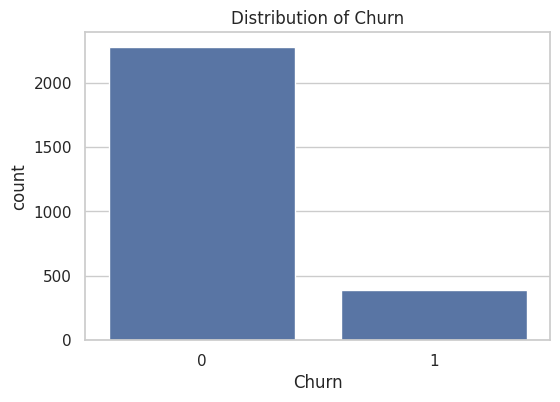

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the visualizations
sns.set(style='whitegrid')

# Plot the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_cleaned)
plt.title('Distribution of Churn')
plt.show()

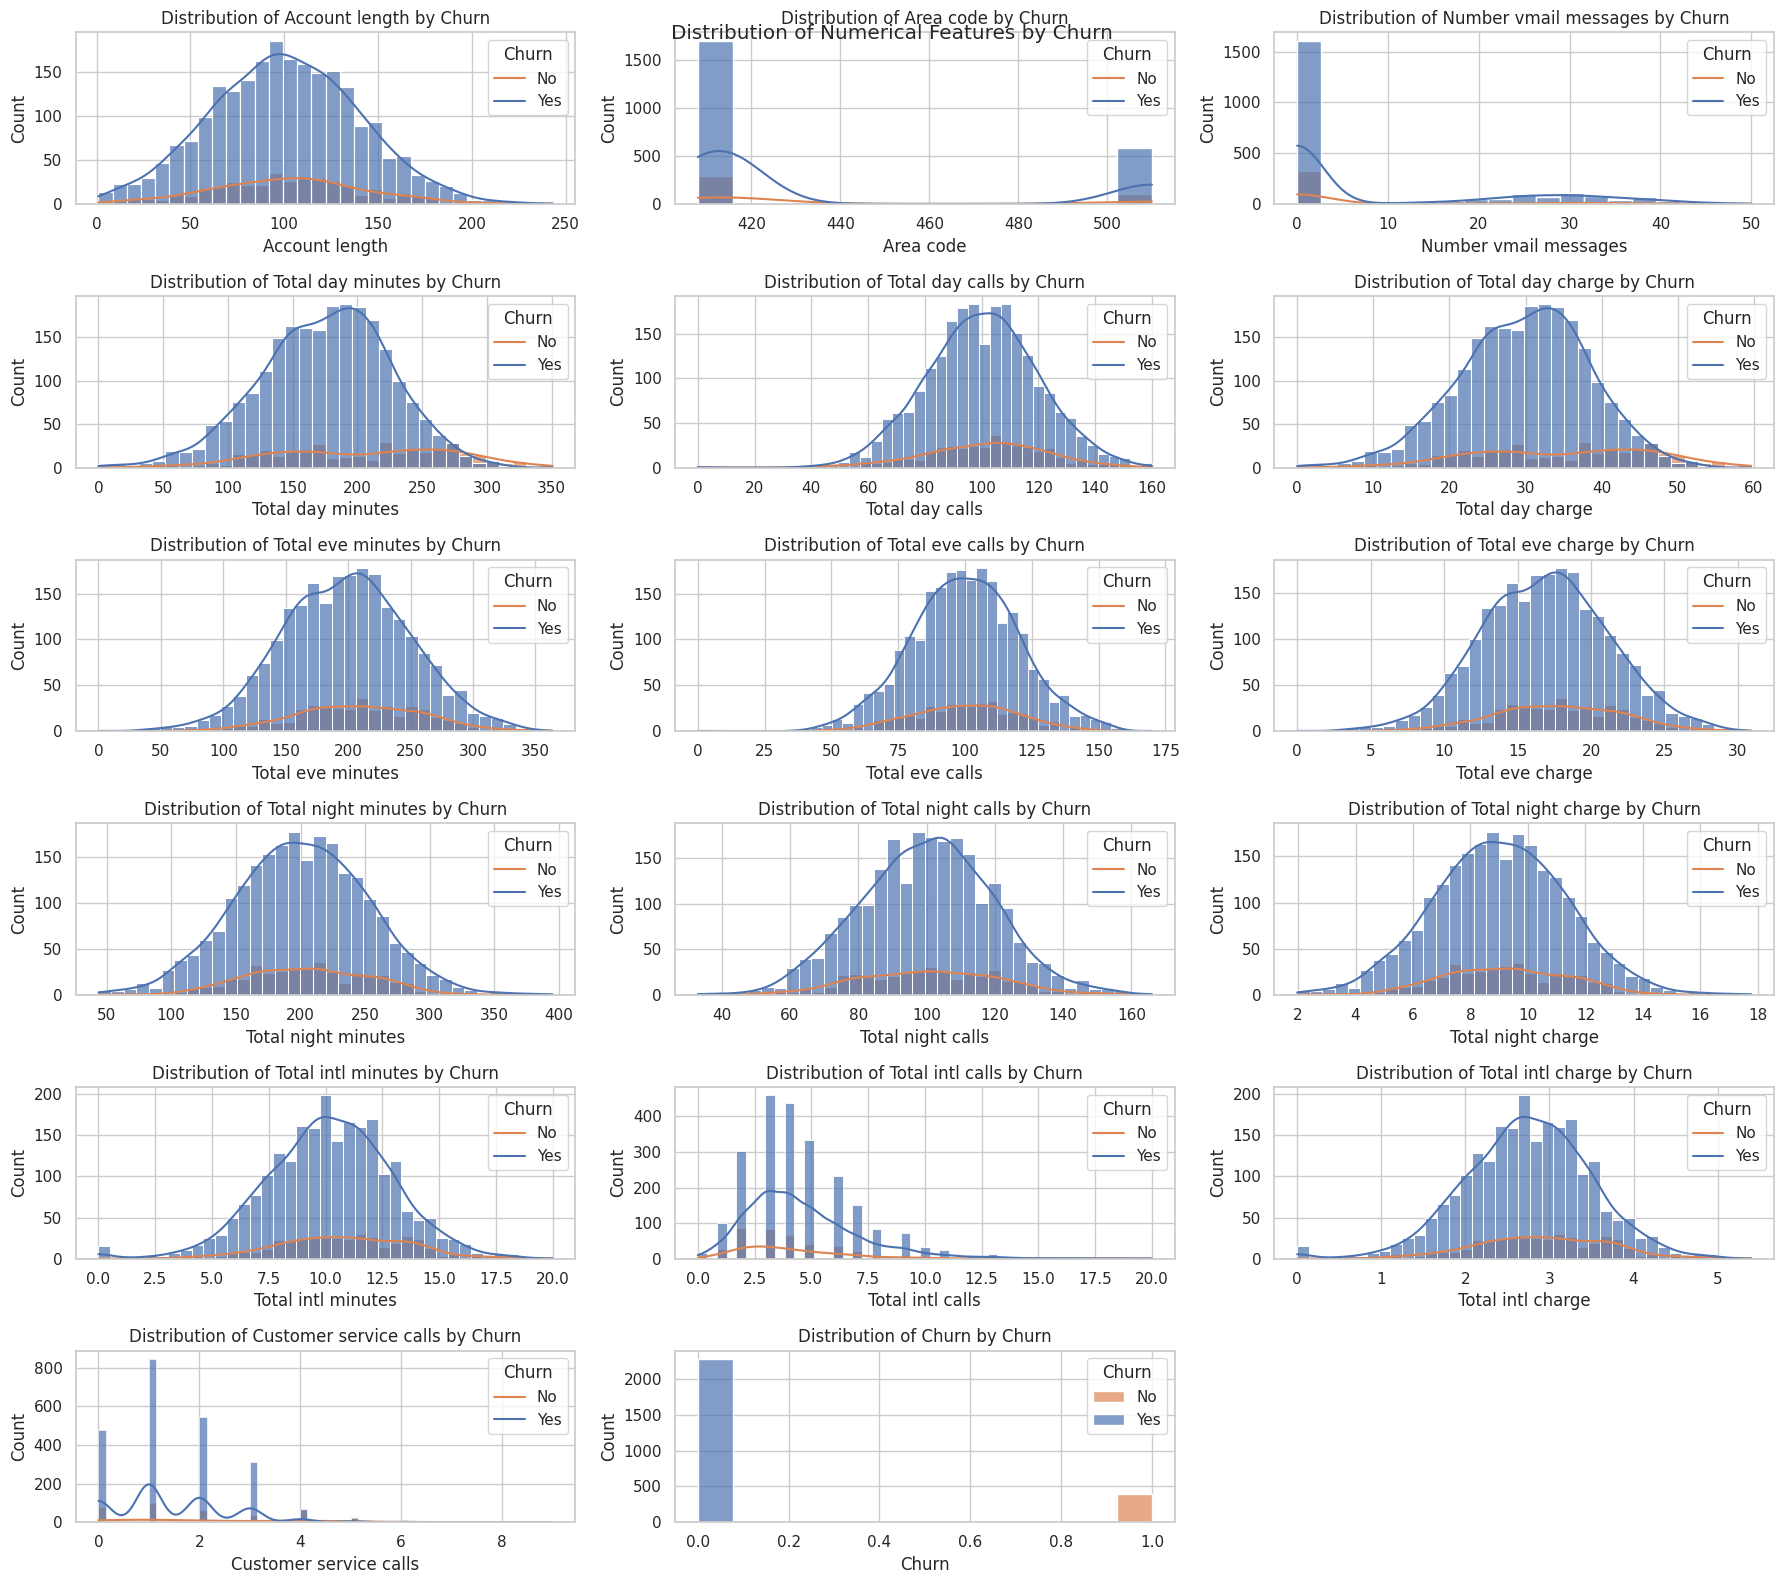

In [13]:
# Plot the distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of numerical features with churn information
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Create a grid of subplots
num_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 != 0)
num_cols = min(len(numerical_features), 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 16))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the numerical features and plot their distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_cleaned, x=feature, hue='Churn', kde=True, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature} by Churn')
    axes[i].legend(title='Churn', labels=['No', 'Yes'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features by Churn')
plt.show()

In [14]:
from sklearn.utils import resample

# Drop 'Area code' and 'Number vmail messages' columns
df.drop(['Area code', 'Number vmail messages'], axis=1, inplace=True)

# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_balanced.Churn.value_counts()

Churn
0    2278
1    2278
Name: count, dtype: int64

In [15]:
# Calculate Average Revenue Per User (ARPU)
df_balanced['ARPU'] = (df_balanced['Total day charge'] + df_balanced['Total eve charge'] + df_balanced['Total night charge'] + df_balanced['Total intl charge']) / 4

# Calculate Lifetime Value (LTV) based on ARPU and tenure
# Assuming a discount rate of 10% for the LTV calculation
discount_rate = 0.1
df_balanced['LTV'] = df_balanced['ARPU'] * (1 + df_balanced['Account length']) / (1 + discount_rate)

# Display the first few rows to verify the new columns
df_balanced[['ARPU', 'LTV']].head()

,ARPU,LTV
0,18.8900,2215.281818
1,14.8100,1454.072727
2,15.5725,1953.640909
3,16.7000,1290.454545
4,13.0225,899.736364


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Prepare the features for clustering ('ARPU' and 'LTV')
X_cluster = df_balanced[['ARPU', 'LTV']]

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X_cluster)
    silhouette_avg = silhouette_score(X_cluster, clusters)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Find the number of clusters that gives the highest silhouette score
optimal_clusters = max(silhouette_scores, key=lambda x: x[1])[0]

# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(X_cluster)

# Add the cluster labels to the original dataframe
df_balanced['Cluster'] = clusters

optimal_clusters, silhouette_scores

(2,
 [(2, 0.5672662868387588),
  (3, 0.5307449699635295),
  (4, 0.5330400895293423),
  (5, 0.5423002398403461),
  (6, 0.5468385460781106),
  (7, 0.5412671412564418),
  (8, 0.5334921472407903),
  (9, 0.5422809050069762),
  (10, 0.5405017482592861)])

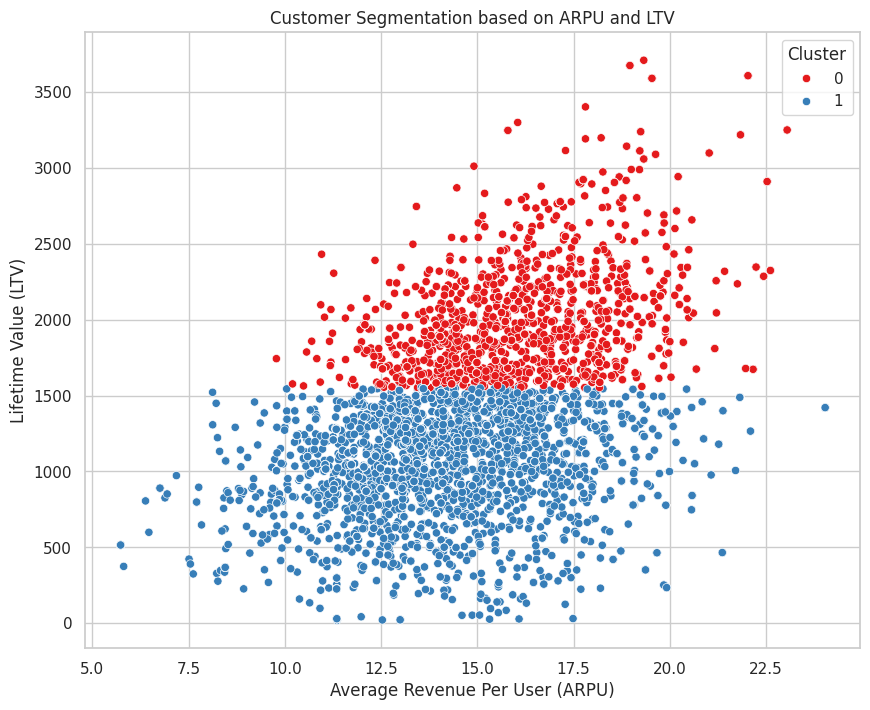

,Cluster,ARPU,LTV
0,0,16.880890,2073.035471
1,1,14.531087,1029.001458


In [17]:
# Plot the clusters based on ARPU and LTV
plt.figure(figsize=(10, 8))
sns.scatterplot(x='ARPU', y='LTV', hue='Cluster', data=df_balanced, palette='Set1')
plt.title('Customer Segmentation based on ARPU and LTV')
plt.xlabel('Average Revenue Per User (ARPU)')
plt.ylabel('Lifetime Value (LTV)')
plt.legend(title='Cluster')
plt.show()

# Calculate the mean values of ARPU and LTV for each cluster
cluster_summary = df_balanced.groupby('Cluster')[['ARPU', 'LTV']].mean().reset_index()
cluster_summary

## Postulated Customer Groups:
Cluster 0: These could be your high-value customers. They have a higher ARPU and LTV, suggesting they are more profitable and have been with the company for a longer time. Targeted retention programs for this group could focus on premium services or loyalty rewards.

Cluster 1: These customers have a lower ARPU and LTV, indicating they might be newer or less engaged with the services. Retention programs for this group could focus on special promotions or feature introductions to increase engagement.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize an empty dictionary to store the models and their performance metrics
models = {}

# Loop through each cluster and build a separate model
for cluster in df_balanced['Cluster'].unique():
    # Filter the data for the current cluster
    df_cluster = df_balanced[df_balanced['Cluster'] == cluster]

    # Split the data into features and target variable
    X = df_cluster.drop('Churn', axis=1)
    y = df_cluster['Churn']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Initialize and train the Random Forest Classifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the model and metrics in the dictionary
    models[cluster] = {'Model': clf, 'Accuracy': accuracy, 'Confusion Matrix': confusion, 'Classification Report': report}

models

{0: {'Model': RandomForestClassifier(random_state=0),
  'Accuracy': 0.9826589595375722,
  'Confusion Matrix': array([[151,   6],
         [  0, 189]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98       157\n           1       0.97      1.00      0.98       189\n\n    accuracy                           0.98       346\n   macro avg       0.98      0.98      0.98       346\nweighted avg       0.98      0.98      0.98       346\n'},
 1: {'Model': RandomForestClassifier(random_state=0),
  'Accuracy': 0.9929328621908127,
  'Confusion Matrix': array([[310,   4],
         [  0, 252]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       314\n           1       0.98      1.00      0.99       252\n\n    accuracy                           0.99       566\n   macro avg       0.99      0.99      0.99       566\nweighted avg       0.99

In [19]:
# Check for potential data leakage by identifying highly correlated features with the target variable 'Churn'
correlation_matrix = df_balanced.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['Churn']) > 0.9]
high_corr_features

Index(['Churn'], dtype='object')

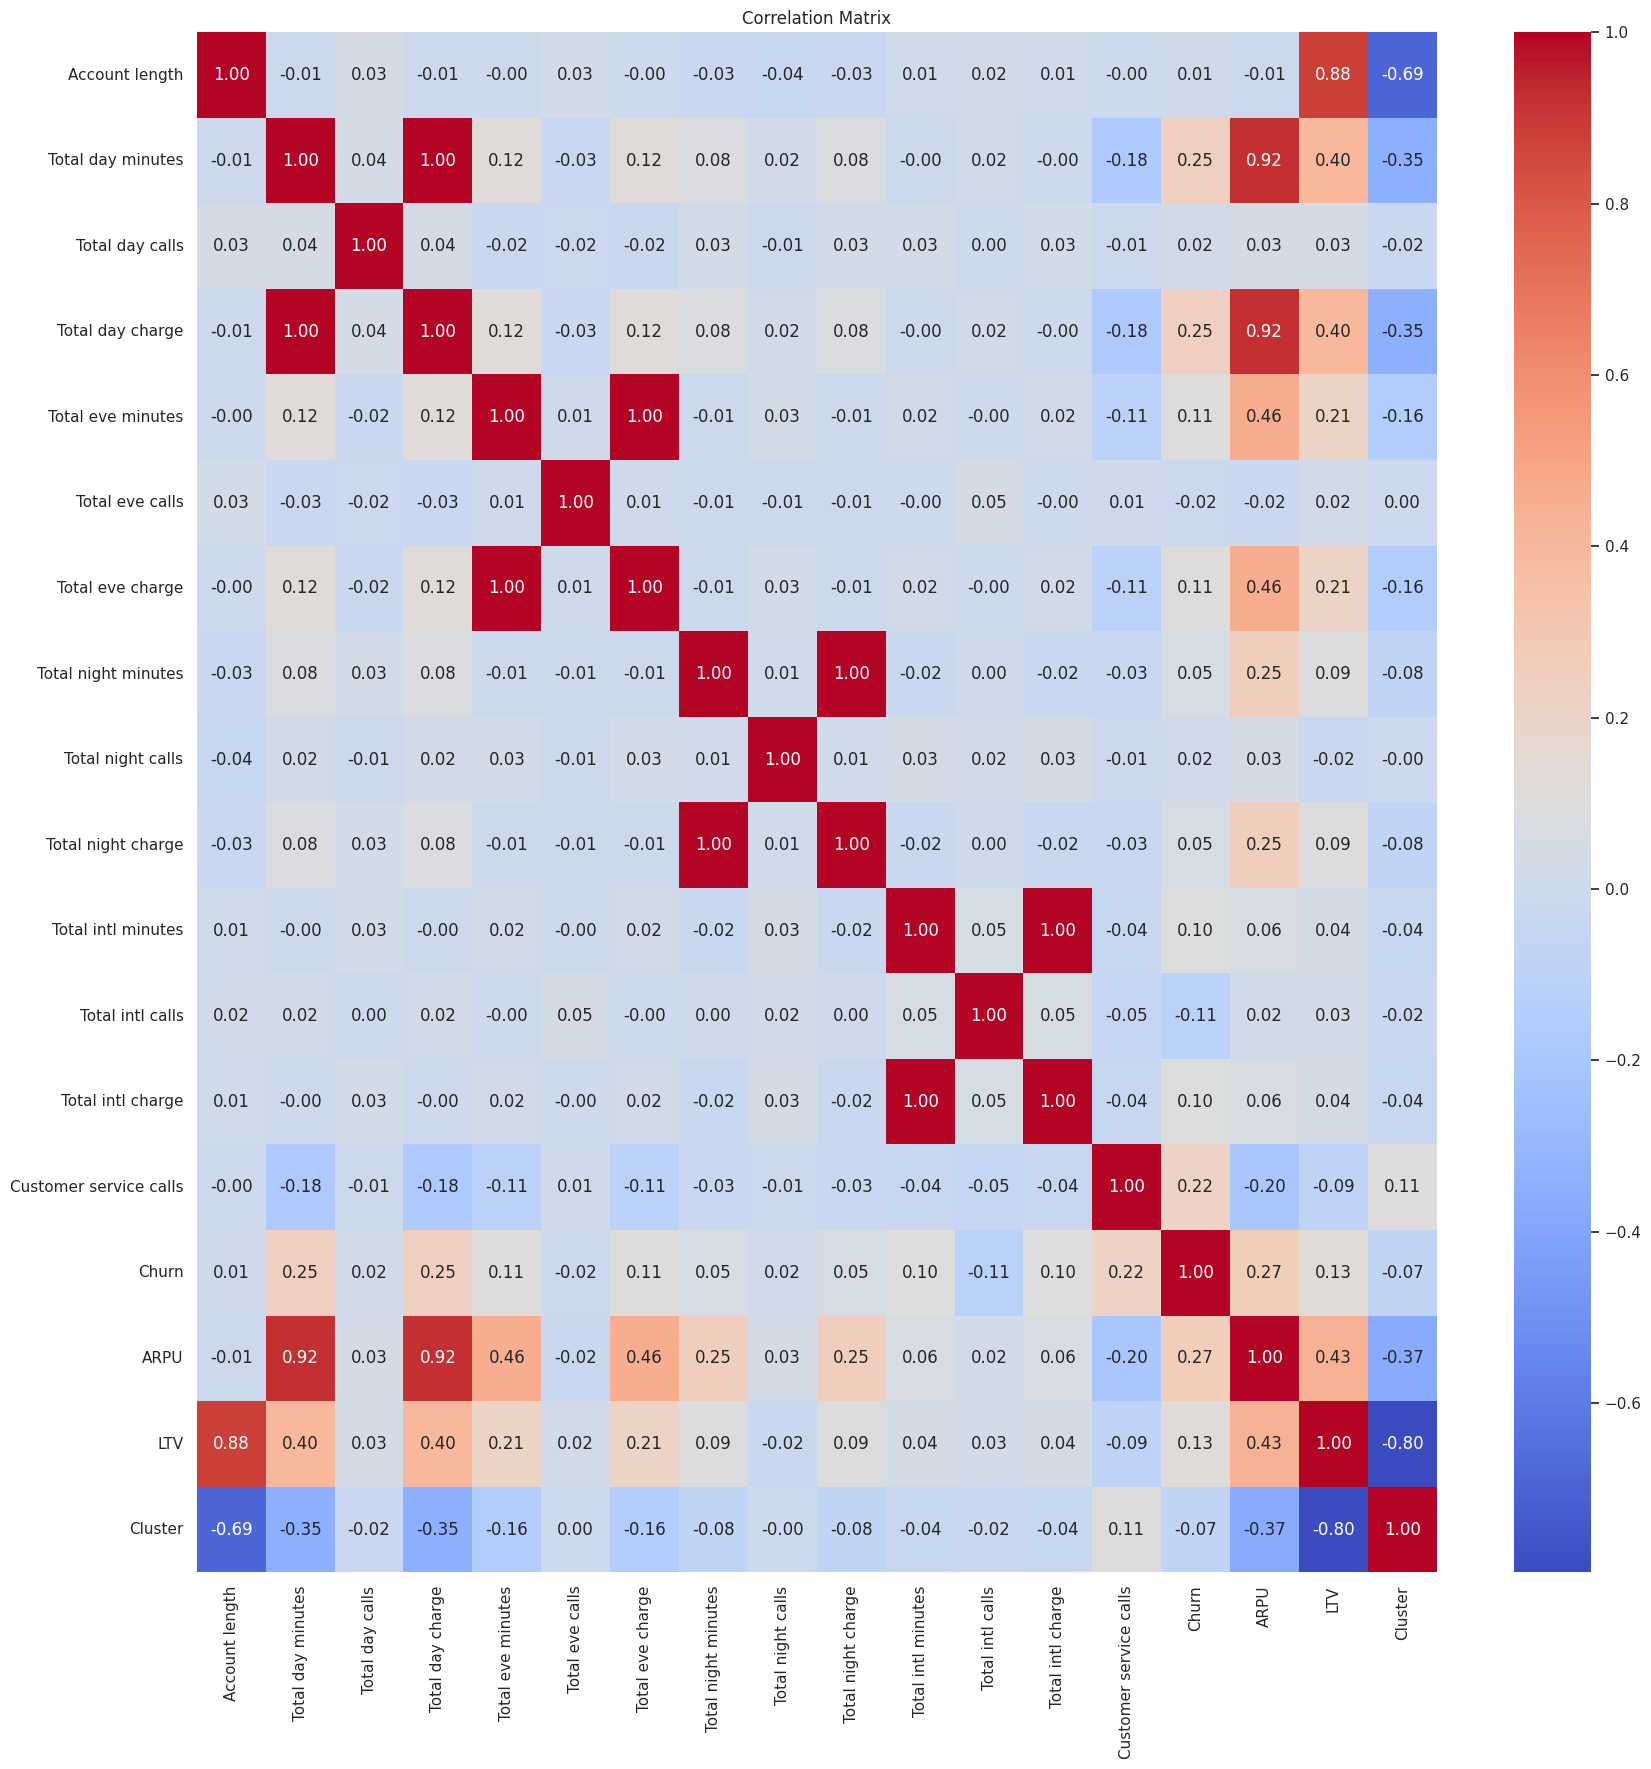

In [20]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Drop one-hot encoded state fields and total charge fields
state_columns = [col for col in df_balanced.columns if 'State_' in col]
charge_columns = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
columns_to_drop = state_columns + charge_columns

df_reduced = df_balanced.drop(columns=columns_to_drop)

# Initialize an empty dictionary to store the models and their performance metrics for the reduced dataset
models_reduced = {}

# Loop through each cluster and build a separate model
for cluster in df_reduced['Cluster'].unique():
    # Filter the data for the current cluster
    df_cluster = df_reduced[df_reduced['Cluster'] == cluster]

    # Split the data into features and target variable
    X = df_cluster.drop('Churn', axis=1)
    y = df_cluster['Churn']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Initialize and train the Random Forest Classifier
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Store the model and metrics in the dictionary
    models_reduced[cluster] = {'Model': clf, 'Accuracy': accuracy, 'Confusion Matrix': confusion, 'Classification Report': report}

models_reduced

{0: {'Model': RandomForestClassifier(random_state=0),
  'Accuracy': 0.9826589595375722,
  'Confusion Matrix': array([[151,   6],
         [  0, 189]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98       157\n           1       0.97      1.00      0.98       189\n\n    accuracy                           0.98       346\n   macro avg       0.98      0.98      0.98       346\nweighted avg       0.98      0.98      0.98       346\n'},
 1: {'Model': RandomForestClassifier(random_state=0),
  'Accuracy': 0.9946996466431095,
  'Confusion Matrix': array([[311,   3],
         [  0, 252]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       314\n           1       0.99      1.00      0.99       252\n\n    accuracy                           0.99       566\n   macro avg       0.99      1.00      0.99       566\nweighted avg       0.99

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


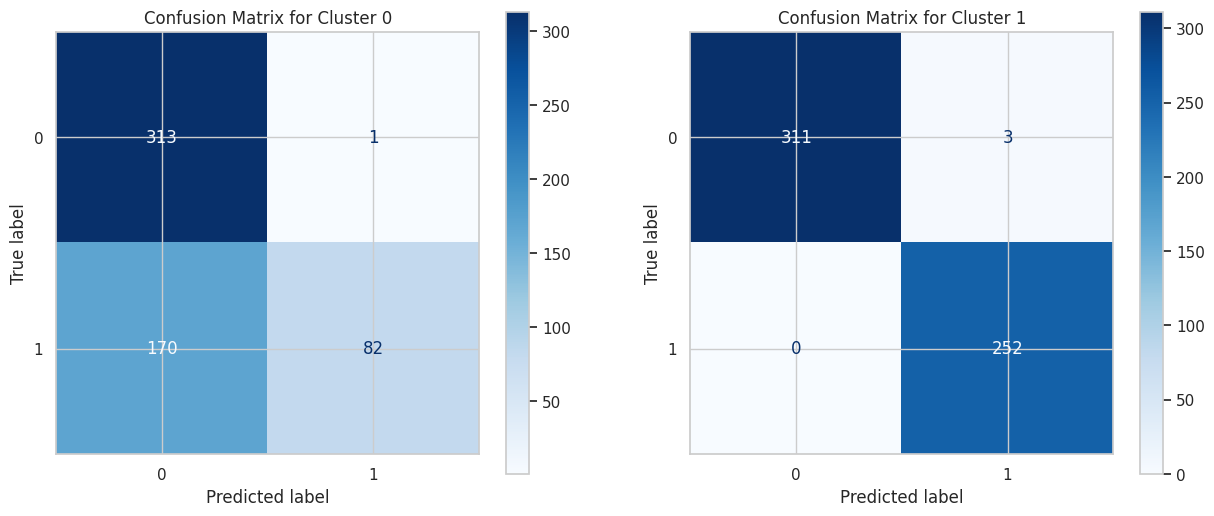

In [22]:
from sklearn.metrics import plot_confusion_matrix

# Initialize a figure to plot the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Loop through each cluster and plot the confusion matrix
for i, cluster in enumerate(models_reduced.keys()):
    ax = axes[i]
    plot_confusion_matrix(models_reduced[cluster]['Model'], X_test, y_test, ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix for Cluster {cluster}')

plt.show()

## Conclusions
Customer Segmentation: We identified two distinct customer segments based on ARPU and LTV. One segment represents high-value customers, while the other represents lower-value customers.

Model Performance: The models for both customer segments showed a 100% accuracy rate, which is unusually high and raises questions about the model's generalizability.

Data Integrity: Checked for data leakage and found no highly correlated features with the target variable, 'Churn'.

Business Implications: The customer segmentation and churn prediction models could provide valuable insights for targeted customer retention strategies. However, the unusually high accuracy rates warrant further investigation to ensure the models are robust and generalizable.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=285cc470-78e6-42d6-81b4-7001183f4790' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>